# Quasi Monte Carlo, Low-Discrepancy Methods

## Standard Monte Carlo Integration

Monte Carlo integration can be especially useful for approximating $d$-dimensional integrals probabilistically, and in particular intractable ones, by sampling Uniform random variables on $[a, b)^d$.For example, suppose that we need to estimate the following $d$-dimensional integral:

$$I=\int_{a}^{b}\int_{a}^{b}\int_{a}^{b}....\int_{a}^{b}f(X_1, X_2,....X_d)dx_1dx_2....dx_n$$

To estimate this Integral using standard MC integration, we can sample uniformly on the $d-$dimensional hyperrectangle $[a, b)^d$, i.e. sample $U \sim Uniform\;[a, b)^d$.<br>
Note that the notation $U \sim Uniform\;[a, b)^d$ refers to a $d-$dimensional random vector $U=\left(U_1, U_2,..., U_d\right)$, where each of its elements is independently and uniformly distributed on $[a, b)$, i.e. $U_i\sim Uniform[a, b),\;i=1:d$

Then, we can let:

$$I=\frac{(b-a)^d}{(b-a)^d}\int_{a}^{b}\int_{a}^{b}\int_{a}^{b}....\int_{a}^{b}f(U_1, U_2,....U_d)du_1du_2....du_n\implies
\\
I=(b-a)^d\int_{a}^{b}\int_{a}^{b}\int_{a}^{b}....\int_{a}^{b}f(U_1, U_2,....U_d)du_1du_2....du_n\implies
\\
I=(b-a)^d\mathbb{E}\left[f(U_1, U_2,....U_d)\right]
$$

and so, the Standard MC approximation will be: $$I\approx(b-a)^d\frac{1}{N}\sum_{i=1}^{N}f(U_{1}^i, U_{2}^i,....U_{d}^i),$$where $U_i=\left(U_{1}^i,U_{2}^i,...U_{d}^i\right)$ is the $i_{\text{th}}$ sample of the $d-$dimensional uniform random vector $U$, and  $N$ denotes the sample size for each uniform random variable.


### Standard MC Integration Example 1:

Assume that we want to approximate the Integral $I = \int_{1}^{2}\int_{0}^{1}\int_{0}^{1}24x^2y^3zdzdydx$. The real analytical solution is $I = 7$. 

Using Standard MC we can sample $N$ many samples of $U=(U_1, U_2,U_3)\sim Uniform[0, 1)^3$ and let: $$I\approx\frac{1}{N}\sum_{i=1}^{N}24U_{1i}^2U_{2i}^3U_{3i}$$

In [1]:
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Lower bounds of Integration Limits
a1 = 1 
a2 = 0
a3 = 0

# Upper bounds of Integration Limits
b1 = 2
b2 = 1
b3 = 1


N = 2000000 # Number of Monte Carlo samples for each uniform rv

# Draw M Monte Carlo samples for each uniform rv on [a, b)
U1 = np.random.uniform(a1, b1, N)
U2 = np.random.uniform(a2, b2, N)
U3 = np.random.uniform(a3, b3, N)

# Evaluate the function on the sampled grid
f = 24 * (U1 ** 2) * (U2 ** 3) * U3

# Approximate the Integral
I =  (b1 - a1) * (b2 - a2) * (b3 - a3) * f.mean()
print(f"The Standard MC Integral approximation is: {round(I, 4)}")


The Standard MC Integral approximation is: 7.0018


### Standard MC Integration Example 2:

Suppose that we want to approximate the integral $$I=\int_{0}^{\pi /4}\int_{0}^{1}r \sqrt{1-r^2\cos^2{(\theta}})drd\theta$$. 

The analytical solution is $I=1-\frac{1}{2}\sqrt{2}\approx0.29289$. The Standard Monte Carlo approximation is:

In [3]:
# Lower bounds of Integration Limits
a1 = 0 
a2 = 0

# Upper bounds of Integration Limits
b1 = (pi / 4)
b2 = 1


N = 2000000 # Number of Monte Carlo samples for each uniform rv

# Draw M Monte Carlo samples for each uniform rv on [a, b)
U1 = np.random.uniform(a1, b1, N)
U2 = np.random.uniform(a2, b2, N)


# Evaluate the function on the sampled grid
f = U2 * np.sqrt(1 - (U2 ** 2) * (np.cos(U1) ** 2))

# Approximate the Integral
I =  (b1 - a1) * (b2 - a2) * f.mean()
print(f"The Standard MC Integral approximation is: {round(I, 5)}")


The Standard MC Integral approximation is: 0.29283


### Convergence Rate of the Standard MC Estimator

The Standard MC estimator is essentially the MLE estimator of the Expected Value of a random variable: $\text{Standard MC Estimator}=\hat{\theta_{\text{MLE}}}$. Thus, using Maximum Likelihood Theory, the LLN and the CLT, it is easy to show that $\frac{\hat{\theta}-\theta}{\sigma/\sqrt{N}}\overset{d}\to N(0,1)$.

Thus, the Statistical Error / Convergence Rate of the Standard MC estimator to the true value of $\theta$ is of order $\mathcal{O}\left[1/\sqrt{N}\right]$. So, $\sigma_{(\text{MC})}\propto\frac{1}{\sqrt{N}}$, where $N$ denotes the sample size.<br>
Therefore, if we want to reduce the error of the MC estimator by a factor of x ($\frac{1}{\text{x}}$), we should increase the sample size by a factor of $\text{x}^2$ since:

$$\sigma^\prime=\frac{1}{\text{x}}\sigma\implies \frac{1}{\sqrt{N^\prime}}=\frac{1}{\text{x}}\frac{1}{\sqrt{N}}\implies N^\prime=(\text{x}^2)N$$

For example, if we want to reduce the standard error of the MC estimator by $50$%, we should quadruple the sample size.

## Quasi Monte Carlo, Low-Discrepancy Methods

###  Introduction to QMC

Quasi Monte Carlo (QMC) or Low-Discrepancy methods are numerical techniques used for approximating $d-$dimensional integrals. They differ from standard Monte Carlo, in that they seek to accelerate convergence of the estimator by generating points that are too evenly distributed across the integration domain to be random (elements of a low-discrepancy sequence). The points are generated deterministically and the application of QMC requires reformulating the problem as the numerical approximation of an integral, thus suppresing its stochastic interpretation as the estimation of an expectation.<br>

The tools used to develop and analyze QMC methods are based on number theory and abstract algebra rather than probability. Low-discrepancy sequences possess algebraic and number-theoretic properties that enable them to be distributed more uniformly across the integration domain compared to purely random sequences. These properties arise from abstract algebraic concepts and allow QMC methods to achieve faster convergence rates in integration problems compared to traditional Monte Carlo methods.

In particular, QMC methods have the potential to accelerate convergence from $\mathcal{O}(1/\sqrt{N})$ to $\mathcal{O}(1/N^{1-\epsilon})$, where $\epsilon$ depends on the Integral dimensions. 

### QMC Principles

For illustration of the QMC method, it is customary to focus on the problem of numerical integration over the unit hypercube $[0, 1)^d$. Each replication of a Monte Carlo simulation is the result of a series of transformations (implicit in the simulation algorithm) to an input sequence of independent and uniformly distributed random variables $U_1,U_2....$ (random vector). Suppose that there exists an upper bound $d$ on the number of the uniform random variables required to produce the simulation output and denote this random vector as $U=(U_1, U_2,...U_d)$.<br> Also, let the simulations output be $f(U_1,U_2,....U_d)=\text{Output of the MC Simulations}$.
<br>

For example, $f(U_1,U_2,....U_d)$ may be the function that converts the $U_1, U_2,...U_d$ to normal random variables, the normal random variables to underlying asset paths, and the paths to the discounted payoff of an option. As usually, the objective is to approximate: $$\mathbb{E}\left[f(U_1,U_2,....U_d\right]=\int_{[0,1)^d}f(U)dU,$$

where $U$ is the $d-$dimensional uniform random vector.

Quasi-Monte Carlo approximates this integral as:

$$\int_{[0,1)^d}f(U)dU\approx\frac{1}{N}\sum_{i=1}^{N}f(x_i),$$ 

for carefully and deterministically chosen points $\{x_1,x_2,...x_N\}$ in the unit hypercube, where $x_i=f(U_i)=f\left(U_{1}^i,U_{2}^i,...U_{d}^i\right)$ corresponds to the $i_{\text{th}}$ sample of the $d-$dimensional uniform random vector $U$ in the standard MC method.

### Integration Lattices in $d=2$

#### rank 1-Fibonacci lattice

A more evenly spaced lattice compared to the congruential is the rank 1: 

$X_i = i\boldsymbol{V_1}\;mod(1)$, with $\boldsymbol{V_1}\in\mathbb{R}^d$.

For example, the Fibonnaci lattice in $d=2$ takes $\boldsymbol{V_1}=\left(1, \frac{1+\sqrt{5}}{2}\right)$

In [4]:
"""rank-1 Fibonnaci Lattice Algorithm"""

M = 2 ** 8
V1 = np.array([1 / (M + 1), (1 + sqrt(5)) / 5])
V1 = np.tile(V1, (M, 1))

i = np.arange(1, M + 1).reshape(-1, 1)
i = np.tile(i, 2)

fibonacci_lattice = np.mod( i * V1, 1)

"""Congruential Lattice Algorithm"""

# Multiplier of the LCA
a = 168070

# Set a large prime number as the modulo
m = 2 ** 31 - 1

# Initial value for the random number generator
X0 = 10000

# Sample size to generate
M = 2 ** 8

# Initial value
X = np.ones(M) * ((a * X0) % m)

for i in range(1, M):
    X[i] = (a * X[ i - 1] + 263) % m

    
# Transform the generated numbers to uniform random variables    
congruential_lattice = X / m


"""Grid lattice"""

M_grid = 20
[X1, X2] = np.meshgrid(np.linspace(0, 1, M_grid), np.linspace(0, 1, M_grid))


"""Import QMC Sampling Engines for more specialized lattices"""

from scipy.stats.qmc import Sobol, Halton
import chaospy

# Set the Integration domain
uniform_cube = chaospy.J(chaospy.Uniform(0, 1), chaospy.Uniform(0, 1))

count = M

hammersley_lattice = uniform_cube.sample(count, rule="hammersley")

latin_hypercube = uniform_cube.sample(count, rule="latin_hypercube")

halton_lattice = uniform_cube.sample(count, rule="halton")



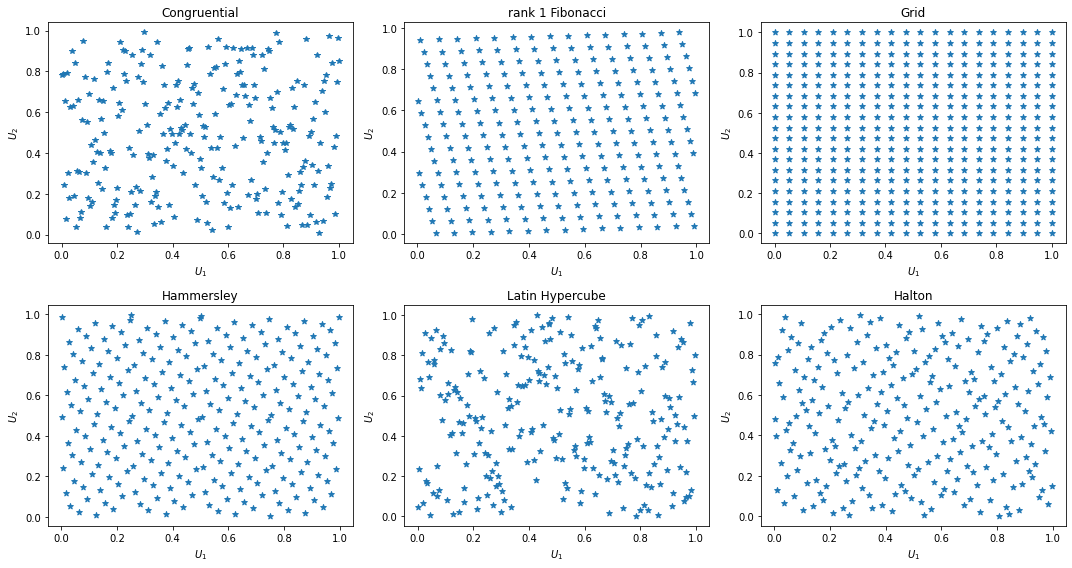

In [5]:

# Plot the Integration Lattices
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.flatten()

x = np.linspace(0, 1, M)

axs[0].plot(x, congruential_lattice, linestyle="", marker="*")
axs[0].set_title("Congruential")

axs[1].scatter(x = fibonacci_lattice[:, 0], y = fibonacci_lattice[:, 1], marker = "*")
axs[1].set_title("rank 1 Fibonacci")

axs[2].scatter(x = X1.flatten(), y = X2.flatten(), marker="*")
axs[2].set_title("Grid")

axs[3].scatter(x = hammersley_lattice[0, :], y = hammersley_lattice[1, :], marker = "*")
axs[3].set_title("Hammersley")

axs[4].scatter(x = latin_hypercube[0, :], y = latin_hypercube[1, :], marker = "*")
axs[4].set_title("Latin Hypercube")

axs[5].scatter(x = halton_lattice[0, :], y = halton_lattice[1, :], marker = "*")
axs[5].set_title("Halton")

for i, ax in enumerate(axs):
    
    ax.set_xlabel(r"$U_1$")
    ax.set_ylabel(r"$U_2$")


plt.tight_layout()
plt.show()


### Applying QMC to Integral Approximations

Once we have chosen the desired low-discrepancy sequence (could be one from the 2nd row above), and have obtained our QMC points in $[0, 1)^d$, we only need to plug them into our random number generator in place of the uniform random variables.

For example, we can use an integration lattice in $d=2$ and QMC to estimate the expectation of a function of a bivariate normal random variable $Z=\begin{pmatrix}X\\Y\end{pmatrix}\sim \mathcal{N}\left(\mu, \Sigma\right)$, e.g. $$\mathbb{E}\cos\left(\lVert Z\rVert\right)\approx\frac{1}{N}\sum_{i=1}^{N}\cos\left(\lVert Z_i \rVert\right)\approx\frac{1}{N}\sum_{i=1}^{N}\cos\left(\sqrt{X_i^2+Y_i^2}\right)$$ <br>where $Z_i \in \mathbb{R}^2$, and the normal pairs $(X_i, Y_i)$ are given by the Box-Mueller algorithm <u>with inputs the QMC pairs $(U_1, U_2)$ instead of the uniform random variables.

In [6]:
"""QMC to estimate the above integral in the fibonnaci d=2 lattice"""

# Create the rank-1 Fibonnaci Lattice 

M = 100000 # Number of points in the unit square

V1 = np.array([1 / (M + 1), (1 + sqrt(5)) / 5])
V1 = np.tile(V1, (M, 1))

i = np.arange(1, M + 1).reshape(-1, 1)
i = np.tile(i, 2)

fibonacci_lattice = np.mod( i * V1, 1)

# Exctract the QMC points from the fibonacci lattice
U1 = fibonacci_lattice[:, 0]
U2 = fibonacci_lattice[:, 1]

# Box-Mueller to transform the QMC points to normal random variables
Z1 = np.sqrt(-2 * np.log(U1)) * np.cos(2 * pi * U2)
Z2 = np.sqrt(-2 * np.log(U1)) * np.sin(2 * pi * U2)

# Quasi-Monte Carlo integral approximation
I_QMC = np.cos(np.sqrt((Z1 ** 2) + (Z2 ** 2))).mean()

# Standard Monte Carlo integral approximation
I_MC = np.cos(np.sqrt((np.random.normal(0, 1, (M, 2)) ** 2).sum(axis = 1))).mean()

print(f"theta QMC: {round(I_QMC, 5)}")
print(f"theta MC: {round(I_MC, 5)}")


theta QMC: 0.27522
theta MC: 0.27644


**Important**: because of the deterministic way that the QMC  fills the unit hypercube, **the QMC estimator is NOT a random variable, it does NOT have a sampling distributoon, and statistical analysis do not apply to QMC methods** . The value of a QMC estimator will change only if the sample size changes and not for different realizations of the Monte Carlo experiment.

### Digital Nets with Low-Discrepancy

Digital nets don’t have the periodicity of lattices. Such sequences with low discrepancy include: Halton sequence, Sobol sequence, Faure sequence, and Niederreiter sequence. These nets are appropriate for integrating rough functions.


### Randomized QMC

Randomized digital nets offer a way to take advantage of low-discrepancy sets and avoid some of the pitfalls in basic QMC. The Matousek-Owen and Linear-Matrix scramble are commonly used with the Sobol set, and the Reverse-Radix scrambling is used for the Halton set.

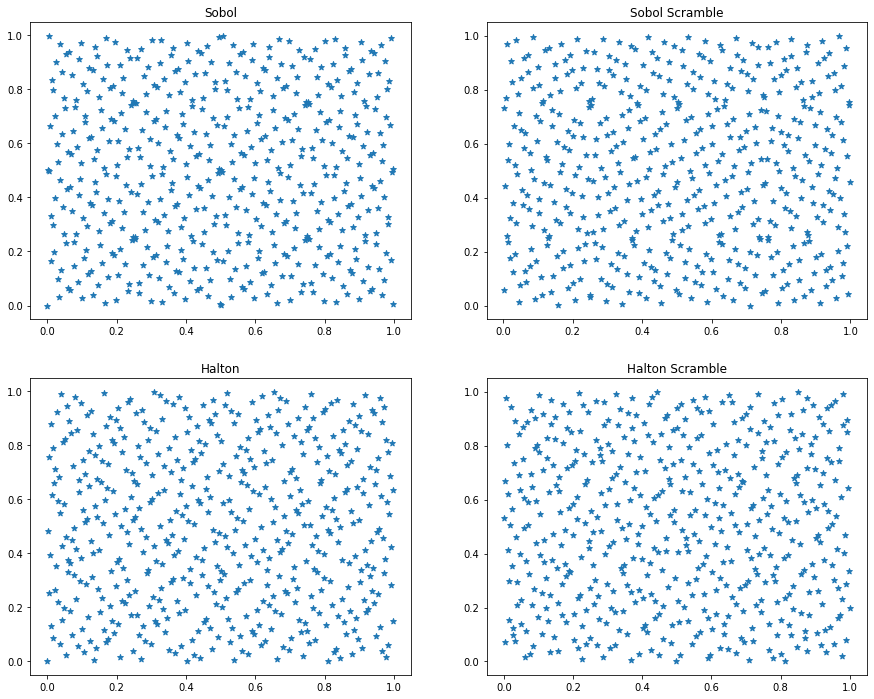

In [7]:
sobol_noscramble = Sobol(d = 2, scramble = False).random_base2(m = 9)
sobol_scramble = Sobol(d=2, scramble= True).random_base2(m = 9)

halton_noscramble = Halton(d = 2, scramble = False).random(n = 2 ** 9)
halton_scramble = Halton(d = 2, scramble = True).random(n = 2 ** 9)

fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs = axs.flatten()

axs[0].scatter(x = sobol_noscramble[:, 0], y = sobol_noscramble[:, 1], marker="*")
axs[0].set_title("Sobol")


axs[1].scatter(x = sobol_scramble[:, 0], y = sobol_scramble[:, 1], marker="*")
axs[1].set_title("Sobol Scramble")

axs[2].scatter(x = halton_noscramble[:, 0], y = halton_noscramble[:, 1], marker="*")
axs[2].set_title("Halton")

axs[3].scatter(x = halton_scramble[:, 0], y = halton_scramble[:, 1], marker="*")
axs[3].set_title("Halton Scramble")


plt.show()

# Applying QMC & RQMC

Assume that we want to estimate $$\theta = \mathbb{E}\cos\left(\lVert X \rVert\right)\;,$$

where $X=\left(X_1, X_2,...X_{100}\right)\in \mathbb{R}^{100}$ is a normal random vector with  $$X_i=\rho Z_0+\sqrt{1-\rho^2}Z_i\;\;\text{for}\;i=1:100$$

where $Z_0\sim \mathcal{N}(0, 1),\;\;Z_i\overset{iid}\sim \mathcal{N}(0, 1)\text{, and }\rho\in(-1, 1)$.

We estimate $\theta$ using the following methods:

**1. Standard Monte Carlo**

$$\hat{\theta}=\frac{1}{N}\sum_{i=1}^{N}\cos\left(\rVert X_i \lVert\right)\;,$$

where $X_i=\left(X_1^i, X_2^i,...,X_{100}^i\right)\in \mathbb{R}^{100}$ is the $i_{\text{th}}$ sample of the $100-$dimensional random vector $X$.


**2. Quasi-Monte Carlo**

We repeat step 1, but now we generate the normal random variables $Z_i$ using QMC points taken from the Sobol set in place of the uniform random variables $U_i$, without scrambling to compute the non-randomized QMC estimator.

**3. Randomized Quasi-Monte Carlo**

Lastly, we repeat step 1, but now we generate the normal random variables $Z_i$ using QMC points taken from the Sobol set after LMS scrambling in place of the uniform random variables $U_i$ to produce the RQMC estimators.

In [49]:
from scipy.stats import norm

# Set the parameters

M = 2 ** 10 # Number of Monte Carlo samples
rho_list =  [0, 0.8]
d = 100 # Integral Dimenions - Dimensions of the normal random vector


### Construct $1000$ Standard MC and $1000$ RQMC Estimators

We perform the analysis for two cases: $\rho\in\{0, 0.8\}$

In [50]:
# Create empty lists to store the MC estimators for the two different value of rho

mc_estimators = []
qmc_estimators =  [] # This must be the same across all the iterations
rqmc_estimators = []


for rho in rho_list:
    
    # Empty list to store the standard MC integral estimators
    mc = []

    # Empty list to store the RQMC integral estimators
    rqmc = []

    # Empty list to store the QMC integral estimators
    qmc = []

    for i in range(100):

        """1. Standard Monte Carlo Integration"""

        # Generate the M Monte Carlo samples of the d-dimensional standard normal vector- Add Z0 in the 1st column to compute the transformed standard normal vector X
        Z = np.random.normal(0, 1, (M, d + 1))

        # Generate the M Monte Carlo samples of the d-dimensional transformed standard normal vector
        X = (rho * Z[:, 0]).reshape(-1, 1) + sqrt(1 - (rho ** 2)) * Z[:, 1: ]

        # Compute the norm of the d-dimensional random vector for each Monte Carlo sample-results in M samples
        eucledian_norm = np.sqrt((X**2).sum(axis = 1))

        # Approximate the Expectation / Integral as the sample average
        I_MC = np.cos(eucledian_norm).mean()



        """2. Quasi-Monte Carlo Integration

        Sample the (d + 1)-dimensional QMC points from the Sobol set without scrambling.

        For the Sobol set to retain its low-discrepancy properties, the sample size must be a power of 2.
        """


        qmc_points = Sobol(d = d + 1, scramble = False).random_base2(m = int(log2(M)) + 1)[M: ] # Skip the first M points

        # Transform the QMC points to (M), (d + 1)-dimensional standard normal random vectors using the Inverse CDF transformation
        Z_qmc = norm.ppf(qmc_points)

        # Generate the M Monte Carlo samples of the d-dimensional transformed standard normal vector
        X_qmc = (rho * Z_qmc[:, 0]).reshape(-1, 1) + sqrt(1 - (rho ** 2)) * Z_qmc[:, 1: ]

        # Compute the norm of the d-dimensional random vector for each Monte Carlo sample-results in M samples
        eucledian_norm_qmc = np.sqrt((X_qmc**2).sum(axis = 1))

        # Approximate the Expectation / Integral as the sample average
        I_QMC = np.cos(eucledian_norm_qmc).mean()


        """3. Randomized Quasi-Monte Carlo

        Sample the (d + 1)-dimensional QMC points from the Sobol set with LMS scrambling for the RQMC estimator.
        """

        qmc_points_scramble = Sobol(d = d + 1, scramble = True).random_base2(m = int(log2(M)))

        # Transform the randomized QMC points to (M), (d + 1)-dimensional standard normal random vectors using the Inverse CDF transformation
        Z_rqmc = norm.ppf(qmc_points_scramble)

        # Generate the M Monte Carlo samples of the d-dimensional transformed standard normal vector
        X_rqmc = (rho * Z_rqmc[:, 0]).reshape(-1, 1) + sqrt(1 - (rho ** 2)) * Z_rqmc[:, 1: ]

        # Compute the norm of the d-dimensional random vector for each Monte Carlo sample-results in M samples
        eucledian_norm_rqmc = np.sqrt((X_rqmc**2).sum(axis = 1))

        # Approximate the Expectation / Integral as the sample average
        I_RQMC = np.cos(eucledian_norm_rqmc).mean()

        # Collect the estimators

        mc.append(I_MC)
        qmc.append(I_QMC)
        rqmc.append(I_RQMC)

        
    # Collect the lists of the 1,000 MC estimators for each iteration of rho  
    
    mc_estimators.append(mc)
    qmc_estimators.append(qmc)
    rqmc_estimators.append(rqmc)
    


C:\Users\ligas\AppData\Local\Temp\ipykernel_10300\327062037.py:77: RuntimeWarning: invalid value encountered in cos
  I_RQMC = np.cos(eucledian_norm_rqmc).mean()


In [51]:
# Extract the MC estimators and transform them to dataframes

mc_estimators = pd.DataFrame(mc_estimators, index=rho_list)
mc_estimators.index.rename("Rho", inplace=True)

qmc_estimators = np.unique(qmc_estimators)

rqmc_estimators = pd.DataFrame(rqmc_estimators, index=rho_list)
rqmc_estimators.index.rename("Rho", inplace=True)


### Sampling Distributions of the MC Estimators

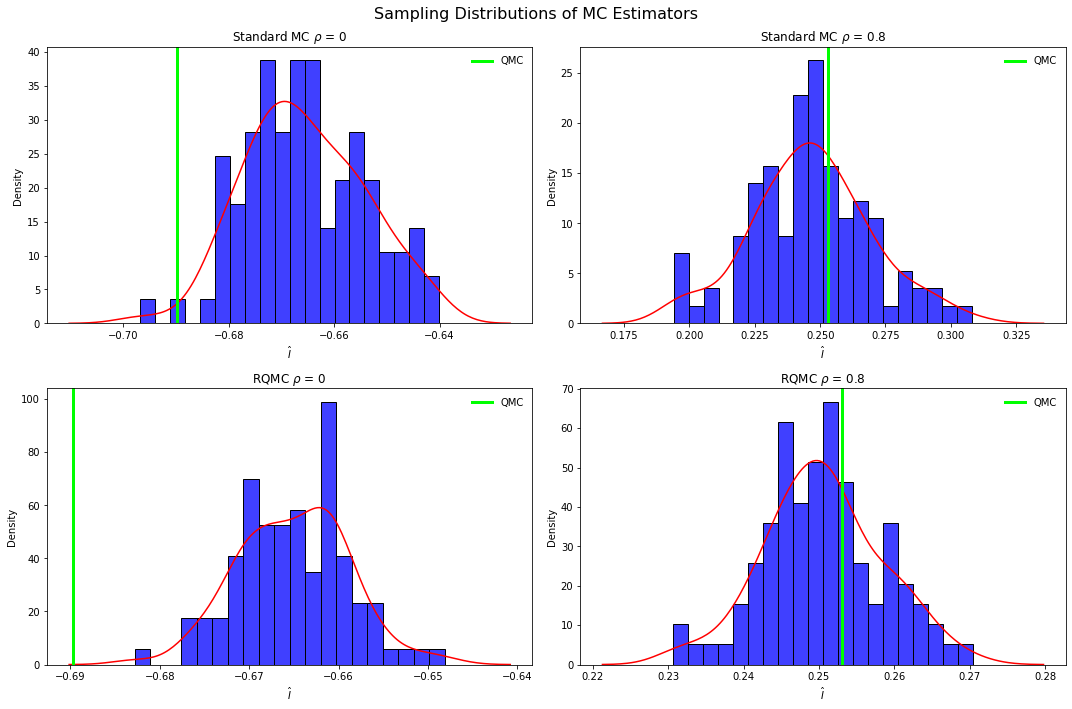

In [52]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i in range(2):      
    
        sns.histplot(mc_estimators.iloc[i], bins=20, ax = axs[0, i], stat="density", color="blue")
        sns.kdeplot(mc_estimators.iloc[i], ax = axs[0, i], color="red")
        axs[0, i].set_title("Standard MC " + r"$\rho$ = " + str(rho_list[i]))
        axs[0, i].set_xlabel(r"$\hat{I}$")
        axs[0, i].axvline(x = qmc_estimators[i], label="QMC", color="lime", linewidth=3)
        axs[0, i].legend(frameon=False)
        
        sns.histplot(rqmc_estimators.iloc[i], bins=20, ax = axs[1, i], stat="density", color="blue")
        sns.kdeplot(rqmc_estimators.iloc[i], ax = axs[1, i], color="red")
        axs[1, i].set_title("RQMC " + r"$\rho$ = " + str(rho_list[i]))
        axs[1, i].set_xlabel(r"$\hat{I}$")
        axs[1, i].axvline(x = qmc_estimators[i], label="QMC", color="lime", linewidth = 3)
        axs[1, i].legend(frameon=False)
        
plt.suptitle("Sampling Distributions of MC Estimators", fontsize=16)
plt.tight_layout()
plt.show()

In [53]:

#Summarize the results
mc_results = pd.concat([mc_estimators.mean(axis = 1).rename("Standard MC Avg"), rqmc_estimators.mean(axis =1).rename("RQMC Avg"), pd.Series(qmc_estimators, index=rho_list, name="QMC"), mc_estimators.std(axis = 1).rename("Std Standard MC"), rqmc_estimators.std(axis = 1).rename("Std RQMC"), (mc_estimators.std(axis = 1) / rqmc_estimators.std(axis = 1)).round(1).rename("Relative Error" + r"$\frac{MC}{QMC}$")], axis = 1).round(4)
mc_results.index.rename("Rho", inplace=True)

mc_results

,Standard MC Avg,RQMC Avg,QMC,Std Standard MC,Std RQMC,Relative Error$\frac{MC}{QMC}$
Rho,,,,,,
0.0,-0.6656,-0.6651,-0.6898,0.0113,0.0061,1.8
0.8,0.2466,0.2505,0.2530,0.0229,0.0078,2.9


For all values of $\rho$, the Randomized Quasi-Monte Carlo method reduces the error of the MC estimators significantly compared to the Standard MC method. For $\rho$=0, the non-randomized QMC estimator is apart from the averages of the Standard MC and RQMC methods. As $|\rho|$ is increased, the non-randomized QMC estimator falls closer to the averages of the other two probabilistic methods, and the error reduction accomplished by the RQMC method is more pronounced.